# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import re
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/DShev1982/skillfactory/master/data%20for%20projects/main_task.xls')

In [ ]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [3]:
def first_look(df,col):
    print('Столбец', col)
    print('Распределение признака:')
    df[col].describe()
    fig, ax = plt.subplots()
    df.loc[:,col].hist(ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('count')
    plt.show()
    sns.boxplot(data = df[col])
    plt.show()

In [4]:
def str_to_list(string):
    symbol_list = ['[',']',"'"]
    
    if string != None:
        for i in symbol_list:
            string = str(string).replace(i,'')
        return string.split(', ')
    return string

In [5]:
def enumrate(string, nan_num):
    if string == nan_num:
        return nan_num
    else:
        if string.count('$') == 1:
            return 1
        elif string.count('$') == 5:
            return 2
        else:
            return 3

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


Видно, что столбцы URL_TA, ID_TA никакой пользы не принесут, удаляю их, чтобы можно было концентрироваться на полезных данных

In [8]:
df1 = df.drop(columns=['URL_TA','ID_TA'])

начинаю последовательно обрабатывать столбцы


Столбец City

In [9]:
df1['City'].value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

Выше, когда смотрел df.info(), видели, что в столбце пропусков не видно. Видно, что городов конечное количество. Удобно будет сделать из такого одного столбца с категориальными данными столбцы, в которых будет 1, если город в строке есть, 0 - если города - нет.

In [10]:
city_list = df1['City'].value_counts().index

In [11]:
df1_5 = pd.get_dummies(df['City'])

In [12]:
for i in df1_5.columns:
    df1.insert(2,i,df1_5[i])

In [13]:
df1

,Restaurant_id,City,Zurich,Warsaw,Vienna,Stockholm,Rome,Prague,Paris,Oslo,...,Berlin,Barcelona,Athens,Amsterdam,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews
0,id_5569,Paris,0,0,0,0,0,0,1,0,...,0,0,0,0,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ..."
1,id_1535,Stockholm,0,0,0,1,0,0,0,0,...,0,0,0,0,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']..."
2,id_352,London,0,0,0,0,0,0,0,0,...,0,0,0,0,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],..."
3,id_3456,Berlin,0,0,0,0,0,0,0,0,...,1,0,0,0,NaN,3458.0,5.0,NaN,3.0,"[[], []]"
4,id_615,Munich,0,0,0,0,0,0,0,0,...,0,0,0,0,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,0,0,0,0,0,0,0,0,...,0,0,0,0,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f..."
39996,id_6340,Paris,0,0,0,0,0,0,1,0,...,0,0,0,0,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter..."
39997,id_1649,Stockholm,0,0,0,1,0,0,0,0,...,0,0,0,0,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel..."
39998,id_640,Warsaw,0,1,0,0,0,0,0,0,...,0,0,0,0,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant..."


успешно добавили столбцы с городами. Дополнительно отмечу, что экспериментировал с тем, чтобы добавлять не все города, а только те, которые чаще всего встречаются и в сумме дают 90% всех строк. Все остальные города (это были такие города, например, как Helsinki (376), Bratislava (301), Luxembourg  (210), Ljubljana (183)...) я обозначал "other cities" и, соответственно, у меня был столбец "other cities". Но в итоге, модель лучше отработала, когда в dataset были все города => я отказался от идеи выбрать только наиболее часто встречающиеся города.

<br> у нас есть столбцы с городами => столбец 'City' больше не нужен. Удаляю

In [14]:
df1.drop(columns = ['City'], inplace = True)

In [15]:
df1

,Restaurant_id,Zurich,Warsaw,Vienna,Stockholm,Rome,Prague,Paris,Oslo,Oporto,...,Berlin,Barcelona,Athens,Amsterdam,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews
0,id_5569,0,0,0,0,0,0,1,0,0,...,0,0,0,0,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ..."
1,id_1535,0,0,0,1,0,0,0,0,0,...,0,0,0,0,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']..."
2,id_352,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],..."
3,id_3456,0,0,0,0,0,0,0,0,0,...,1,0,0,0,NaN,3458.0,5.0,NaN,3.0,"[[], []]"
4,id_615,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f..."
39996,id_6340,0,0,0,0,0,0,1,0,0,...,0,0,0,0,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter..."
39997,id_1649,0,0,0,1,0,0,0,0,0,...,0,0,0,0,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel..."
39998,id_640,0,1,0,0,0,0,0,0,0,...,0,0,0,0,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant..."


Столбец Cuisine Style. df.info() показал, что в столбце есть пропуски. Также столбец содержит на данный момент даже не списки, а просто текст => нужно:
<br> 1) заполнить пробелы;
<br> 2) превратить текст в списки значений.

<br> пропуски заполню значением "other_cuisines".
<br> для превращения текста в списки использую написанную функцию str_to_list - определение функции см. в самом верху ноутбука

In [16]:
df1['Cuisine Style'] = df1['Cuisine Style'].fillna('other_cuisines').apply(str_to_list)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   Zurich             40000 non-null  uint8  
 2   Warsaw             40000 non-null  uint8  
 3   Vienna             40000 non-null  uint8  
 4   Stockholm          40000 non-null  uint8  
 5   Rome               40000 non-null  uint8  
 6   Prague             40000 non-null  uint8  
 7   Paris              40000 non-null  uint8  
 8   Oslo               40000 non-null  uint8  
 9   Oporto             40000 non-null  uint8  
 10  Munich             40000 non-null  uint8  
 11  Milan              40000 non-null  uint8  
 12  Madrid             40000 non-null  uint8  
 13  Lyon               40000 non-null  uint8  
 14  Luxembourg         40000 non-null  uint8  
 15  London             40000 non-null  uint8  
 16  Ljubljana          400

In [18]:
for i in df1['Cuisine Style'][0]:
    print(i)

European
French
International


в двух ячейках выше я проверил, что пропусков больше нет, и что теперь в ячейкайх списки значений, а не просто текст.

<br> составим список всех кухонь

In [19]:
cuisines_list = []
for c_list in df1['Cuisine Style']:
    for cus in c_list:
        cuisines_list.append(cus)
cus_freq = pd.Series(cuisines_list).value_counts()
cus_list = cus_freq.index
cus_list


Index(['Vegetarian Friendly', 'European', 'other_cuisines', 'Mediterranean',
       'Italian', 'Vegan Options', 'Gluten Free Options', 'Bar', 'French',
       'Asian',
       ...
       'Ecuadorean', 'Fujian', 'Welsh', 'Polynesian', 'Azerbaijani',
       'Salvadoran', 'Burmese', 'Latvian', 'Yunnan', 'Xinjiang'],
      dtype='object', length=126)

Список составили в ячейке выше. Теперь по аналогии со столбцами с городами, добавим столбцы с названиями кухонь. С тем отличием, что в случае с городами, мы сразу могли, используя get_dummies метод заполнить же столбцы, а в случае с кухнями, нам нужно будет сначала создать столбцы, заполненные 0, затем - заполнить их. Т.к. в столбце Cuisine Style содержатся списки, а не конкретные единичные значения.

In [20]:
for i in cus_list:
    df1.insert(33,i,0)
df1

,Restaurant_id,Zurich,Warsaw,Vienna,Stockholm,Rome,Prague,Paris,Oslo,Oporto,...,Italian,Mediterranean,other_cuisines,European,Vegetarian Friendly,Ranking,Rating,Price Range,Number of Reviews,Reviews
0,id_5569,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ..."
1,id_1535,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']..."
2,id_352,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],..."
3,id_3456,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3458.0,5.0,NaN,3.0,"[[], []]"
4,id_615,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f..."
39996,id_6340,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter..."
39997,id_1649,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel..."
39998,id_640,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant..."


столбцы создали, в ячейке выше. Ниже заполняем их.

In [21]:
for i in df1['Cuisine Style'].index:
    Cus_style_value = df1['Cuisine Style'][i]    
    for j in Cus_style_value:
        df1[j][i] = 1

A:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
pd.set_option('display.max_columns', None)

In [23]:
df1.sample(5)

,Restaurant_id,Zurich,Warsaw,Vienna,Stockholm,Rome,Prague,Paris,Oslo,Oporto,Munich,Milan,Madrid,Lyon,Luxembourg,London,Ljubljana,Lisbon,Krakow,Helsinki,Hamburg,Geneva,Edinburgh,Dublin,Copenhagen,Budapest,Brussels,Bratislava,Berlin,Barcelona,Athens,Amsterdam,Cuisine Style,Xinjiang,Yunnan,Latvian,Burmese,Salvadoran,Azerbaijani,Polynesian,Welsh,Fujian,Ecuadorean,Native American,Caucasian,Uzbek,Canadian,New Zealand,Chilean,Albanian,Romanian,Minority Chinese,Central Asian,Filipino,Mongolian,Armenian,Georgian,Southwestern,Ukrainian,Singaporean,Cambodian,Colombian,Egyptian,Cajun & Creole,Tunisian,Hawaiian,Afghani,Taiwanese,Cuban,Australian,Tibetan,Sri Lankan,Jamaican,Croatian,Malaysian,Venezuelan,Ethiopian,Kosher,Arabic,Persian,Russian,Indonesian,Slovenian,Israeli,Norwegian,Bangladeshi,Nepali,Balti,Caribbean,Peruvian,Pakistani,Brazilian,Central American,Moroccan,African,Scottish,Korean,Argentinean,Swedish,Danish,Swiss,Brew Pub,Street Food,Belgian,Irish,Dutch,Diner,Latin,Lebanese,Scandinavian,Hungarian,Polish,South American,Austrian,Delicatessen,Turkish,Mexican,Gastropub,Grill,Soups,Eastern European,Vietnamese,Contemporary,Barbecue,Steakhouse,Fusion,Czech,Halal,Greek,Healthy,German,Wine Bar,Thai,Middle Eastern,Indian,Portuguese,Chinese,Sushi,American,Central European,Japanese,Seafood,International,British,Fast Food,Cafe,Pub,Spanish,Pizza,Asian,French,Bar,Gluten Free Options,Vegan Options,Italian,Mediterranean,other_cuisines,European,Vegetarian Friendly,Ranking,Rating,Price Range,Number of Reviews,Reviews
14629,id_10298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Cafe],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10307.0,4.0,NaN,16.0,"[['Tasty breakfast!', 'Tasty breakfast'], ['12..."
10528,id_1235,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[other_cuisines],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1236.0,4.5,NaN,3.0,"[['Toberlone tort'], ['11/12/2017']]"
1603,id_2612,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[other_cuisines],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2613.0,2.0,NaN,14.0,"[[""Not a very 'gourmet' Chinese""], ['07/17/201..."
14916,id_419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"[Japanese, Sushi, Asian, Vegetarian Friendly, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,420.0,4.0,$$ - $$$,243.0,"[['Good food', 'Do the Karaoke!'], ['01/06/201..."
24864,id_954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,"[European, Scandinavian, Danish]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,956.0,3.5,$$ - $$$,190.0,"[['Good lunch not so quick on the service', 'N..."


в 3 ячейках выше заполнил столбцы и проверил, заполнены ли они. Столбцы добавлены и заполнены успешно.
Также, как и с городами, экспериментировал с тем, чтобы добавлять не все кухни, а только те, которые чаще всего встречаются и в сумме дают 90% всех строк. В итоге, модель лучше отработала, когда в dataset были все кухни => я отказался от идеи выбрать только наиболее часто встречающиеся кухни.

т.к. столбец Cuisine Style больше не нужен, удаляю его

In [24]:
pd.reset_option("^display")

In [25]:
df1.drop(columns=['Cuisine Style'],inplace=True)

In [26]:
df1.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 163 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant_id        40000 non-null  object 
 1   Zurich               40000 non-null  uint8  
 2   Warsaw               40000 non-null  uint8  
 3   Vienna               40000 non-null  uint8  
 4   Stockholm            40000 non-null  uint8  
 5   Rome                 40000 non-null  uint8  
 6   Prague               40000 non-null  uint8  
 7   Paris                40000 non-null  uint8  
 8   Oslo                 40000 non-null  uint8  
 9   Oporto               40000 non-null  uint8  
 10  Munich               40000 non-null  uint8  
 11  Milan                40000 non-null  uint8  
 12  Madrid               40000 non-null  uint8  
 13  Lyon                 40000 non-null  uint8  
 14  Luxembourg           40000 non-null  uint8  
 15  London               40000 non-null

столбцы Ranking и Rating - можно было бы их нормализовать, особенно  Ranking, т.к. у него разлет в 4 порядка (df['Ranking'].max()/df['Ranking'].min() = 16444 - см. в ячейке ниже), но эксперименты показали, что это на модель не влияет => оставляю, как есть.

In [27]:
df['Ranking'].max()/df['Ranking'].min()

16444.0

Столбец Price Range - есть много пропусков. почти 14000 из 40000. Есть всего 3 значения (см. ячейку ниже), т.к. столбец подразумевает дороговизну ресторана, имеет смысл не делать dummy столбцы, как для Cuisine Style и City, а просто заполнить числами. Пропуски = 0, и дальше по возрастанию (самый дешевый = 1, самый дорогой = 3).

Для заполнения использую функцию enumrate, которую определил в начале ноутбука

In [28]:
df1['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [29]:
df1['Price Range'].fillna(0, inplace = True)

In [30]:
df1['Price Range'] = df1['Price Range'].apply(lambda x: enumrate(x,0))

In [31]:
df1['Price Range']

0        2
1        0
2        3
3        0
4        2
        ..
39995    2
39996    2
39997    0
39998    2
39999    2
Name: Price Range, Length: 40000, dtype: int64

столбец Price Range заполнен.

Столбец Number of Reviews содержит (как показывает df.info()) небольшое - около 2500 на 40000 - количество пропусков значений. Заполню пропуски 0. В остальном изменять столбец не буду.

In [32]:
df1['Number of Reviews'].fillna(0, inplace = True)

последний столбец Reviews содержит текст (см. 2 ячейки нижу), из которого можно сделать список, содержащий несколько текстовых отзывов и дат этих отзывов. Даты в формате месяц/день/год.

Текстовые отзывы в свободной форме => не видно, какую пользу могут принести => первый этап обработки - оставить только даты. делаю ниже

In [33]:
pd.set_option('display.max_colwidth', None)

In [34]:
df1['Reviews'].sample(10)

26423                                                                                                          [[], []]
26897    [['Can be the best caffe in 3 days trip in Ro...', 'Great food and super cozy'], ['10/31/2016', '07/30/2016']]
29349                                                                                                          [[], []]
23591                                                               [['LOVE IT!!', 'Ok'], ['01/05/2018', '01/02/2017']]
10498                                            [['so tasty', 'Superb Turkish Cuisine'], ['11/10/2017', '09/16/2017']]
21454                                        [['Delicious food', 'Agressive Proprietor'], ['05/24/2016', '04/05/2016']]
4942             [['Relaxing friendly evening meal', 'Fantastic kitchen and atmosphere'], ['12/17/2017', '12/12/2017']]
861                                          [['Nothing exceptional', 'Simple but good'], ['01/23/2017', '12/02/2017']]
15332                             [['Bes

In [35]:
pd.reset_option("^display")

In [36]:
rev = df1['Reviews'].apply(lambda x: re.findall(r"'(\d+\/\d+\/\d+)'", x))

In [37]:
dt_obj_list = [[dt.datetime.strptime(y, '%m/%d/%Y') for y in x] for x in rev]

в 2 ячейках выше я оставил в Reviews только даты - сначала оставил текстовые значения месяц/день/год, а потом преобразовал их именно в даты. Также, эксперименты показали, что если создать столбец, который будет содержать количество дат, когда были оставлены отзывы, это улучшает модель => ниже это делаю

In [38]:
num_of_dates = pd.Series([len(x) for x in dt_obj_list])

In [39]:
num_of_dates.value_counts()

2    28973
0     6471
1     4556
dtype: int64

по итогу преобразований, у меня столбец Reviews содержит список, в котором может быть от 0 до 2 дат. ЧТо делать в случае, когда 2 даты?

Посмотрим, какой может быть разлет дат.

In [40]:
diff_in_days = [abs(x[0] - x[1]).days if len(x) > 1 else 0 for x in dt_obj_list]
diff_in_days.sort(reverse=True)
diff_in_days

[3207,
 3137,
 3127,
 3096,
 3094,
 3040,
 3035,
 2966,
 2943,
 2940,
 2897,
 2788,
 2618,
 2608,
 2478,
 2466,
 2425,
 2373,
 2366,
 2271,
 2230,
 2217,
 2151,
 2125,
 2114,
 2081,
 2074,
 2062,
 2051,
 2033,
 2019,
 2003,
 1975,
 1960,
 1953,
 1949,
 1924,
 1902,
 1879,
 1853,
 1843,
 1821,
 1818,
 1817,
 1813,
 1808,
 1806,
 1801,
 1798,
 1781,
 1779,
 1777,
 1766,
 1764,
 1764,
 1756,
 1754,
 1753,
 1742,
 1741,
 1739,
 1734,
 1732,
 1729,
 1725,
 1716,
 1713,
 1712,
 1707,
 1698,
 1694,
 1688,
 1674,
 1670,
 1657,
 1648,
 1640,
 1636,
 1631,
 1630,
 1621,
 1617,
 1606,
 1604,
 1597,
 1596,
 1596,
 1595,
 1591,
 1586,
 1585,
 1581,
 1576,
 1570,
 1562,
 1555,
 1554,
 1544,
 1543,
 1540,
 1534,
 1526,
 1505,
 1504,
 1497,
 1490,
 1489,
 1488,
 1485,
 1482,
 1473,
 1469,
 1469,
 1469,
 1467,
 1467,
 1457,
 1456,
 1455,
 1452,
 1452,
 1448,
 1447,
 1442,
 1440,
 1439,
 1437,
 1434,
 1433,
 1432,
 1426,
 1422,
 1421,
 1418,
 1417,
 1413,
 1409,
 1406,
 1404,
 1403,
 1402,
 1391,
 1389,

видим, что разлет дат в одной строке может составлять до около 10 лет. Во многих ячейках разлет составляет больше года => для упрощения данных, оставлю только последнюю дату. 

Также, оставлю не только последнюю даты, но из даты выделю год, сезон (1 - зима, 2 - весна, 3 - лето, 4 - осень), и был ли это выходной или нет (1 - суббота, воскресенье, 0 - все остальное). Там, где даты не было вообще в год, сезон, выходной будут нули.

Отмечу, что экспериментировал с тем, чтобы пропуски (год, сезон, выходной) заполнить самыми часто встречающимися значениями и средними значениями, но лучше всего получилось именно так, как предлагаю выше.

In [41]:
result_date = [max(x) if len(x) > 0 else 0 for x in dt_obj_list]

In [42]:
result_year = pd.Series([x.year if isinstance(x, dt.datetime) else x for x in result_date])

In [43]:
result_season = pd.Series([x.month%12//3 +1 if isinstance(x, dt.datetime) else x for x in result_date])

In [45]:
result_weekend = pd.Series([(x.weekday() // 5) + 1 if isinstance(x, dt.datetime) else x for x in result_date])

In [46]:
for i in range(0,5):
    buf_name = df1.columns[-1]
    col_buf = df1.pop(buf_name)
    df1.insert(0,buf_name,col_buf)
df1

,Ranking,Rating,Price Range,Number of Reviews,Reviews,Restaurant_id,Zurich,Warsaw,Vienna,Stockholm,...,Asian,French,Bar,Gluten Free Options,Vegan Options,Italian,Mediterranean,other_cuisines,European,Vegetarian Friendly
0,5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",id_5569,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",id_1535,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",id_352,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
3,3458.0,5.0,0,3.0,"[[], []]",id_3456,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",id_615,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,4.5,2,79.0,"[['The real Italian experience!', 'Wonderful f...",id_499,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
39996,6341.0,3.5,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",id_6340,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1
39997,1652.0,4.5,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",id_1649,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39998,641.0,4.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",id_640,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [47]:
df1.drop(columns=['Reviews'], inplace=True)
df1.insert(4,'year',result_year)
df1.insert(5,'season',result_season)
df1.insert(6,'weekend',result_weekend)

In [48]:
df1.insert(4,'number of dates',num_of_dates)

In [174]:
df1['weekend'] = result_weekend

In [49]:
df1

,Ranking,Rating,Price Range,Number of Reviews,number of dates,year,season,weekend,Restaurant_id,Zurich,...,Asian,French,Bar,Gluten Free Options,Vegan Options,Italian,Mediterranean,other_cuisines,European,Vegetarian Friendly
0,5570.0,3.5,2,194.0,2,2017,1,2,id_5569,0,...,0,1,0,0,0,0,0,0,1,0
1,1537.0,4.0,0,10.0,2,2017,3,1,id_1535,0,...,0,0,0,0,0,0,0,1,0,0
2,353.0,4.5,3,688.0,2,2018,1,1,id_352,0,...,1,0,0,1,1,0,0,0,0,1
3,3458.0,5.0,0,3.0,0,0,0,0,id_3456,0,...,0,0,0,0,0,0,0,1,0,0
4,621.0,4.0,2,84.0,2,2017,4,2,id_615,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,4.5,2,79.0,2,2017,1,2,id_499,0,...,0,0,0,1,1,1,0,0,0,1
39996,6341.0,3.5,2,542.0,2,2017,1,1,id_6340,0,...,0,1,1,0,0,0,0,0,1,1
39997,1652.0,4.5,0,4.0,2,2016,4,1,id_1649,0,...,0,0,0,0,0,0,0,0,0,0
39998,641.0,4.0,2,70.0,2,2017,3,1,id_640,0,...,0,0,0,0,0,0,0,0,1,1


In [50]:
df1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 166 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ranking              40000 non-null  float64
 1   Rating               40000 non-null  float64
 2   Price Range          40000 non-null  int64  
 3   Number of Reviews    40000 non-null  float64
 4   number of dates      40000 non-null  int64  
 5   year                 40000 non-null  int64  
 6   season               40000 non-null  int64  
 7   weekend              40000 non-null  int64  
 8   Restaurant_id        40000 non-null  object 
 9   Zurich               40000 non-null  uint8  
 10  Warsaw               40000 non-null  uint8  
 11  Vienna               40000 non-null  uint8  
 12  Stockholm            40000 non-null  uint8  
 13  Rome                 40000 non-null  uint8  
 14  Prague               40000 non-null  uint8  
 15  Paris                40000 non-null

Данные подготовлены, посмотрим на данные в графике. Для этого будем использовать функцию first_look, определенную в самом начале ноутбука.

Столбец Ranking
Распределение признака:


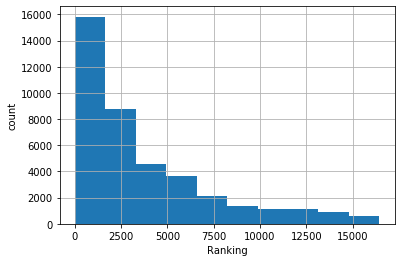

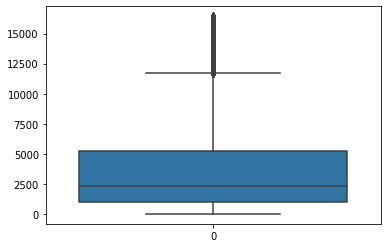

In [51]:
first_look(df1, 'Ranking')

Столбец Rating
Распределение признака:


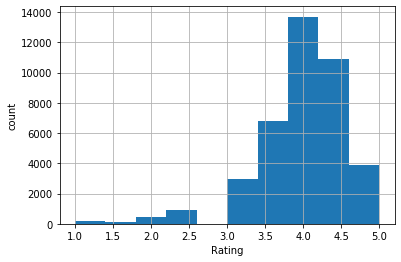

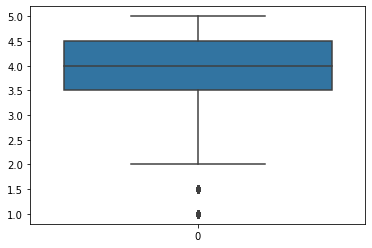

In [52]:
first_look(df1, 'Rating')

Столбец Price Range
Распределение признака:


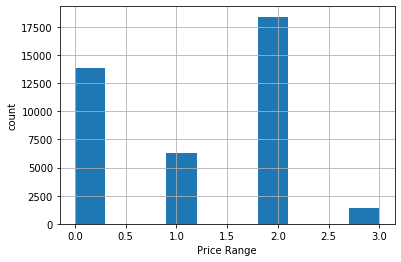

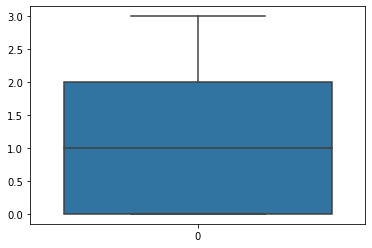

In [53]:
first_look(df1, 'Price Range')

Столбец Number of Reviews
Распределение признака:


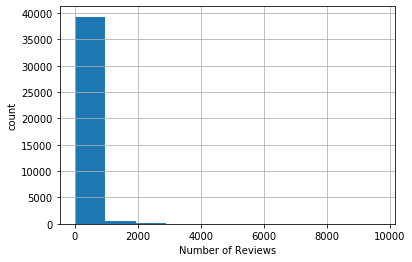

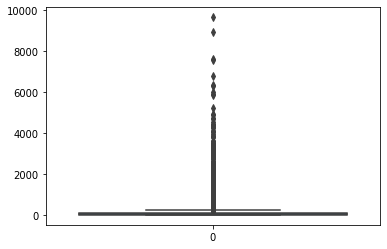

In [54]:
first_look(df1, 'Number of Reviews')

Столбец year
Распределение признака:


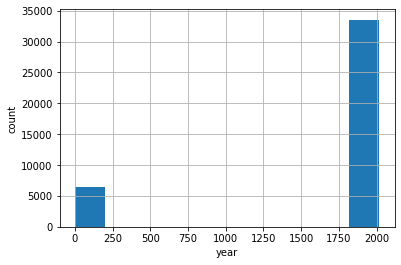

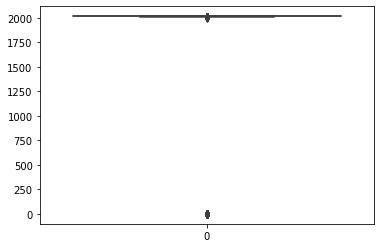

In [55]:
first_look(df1, 'year')

Столбец weekend
Распределение признака:


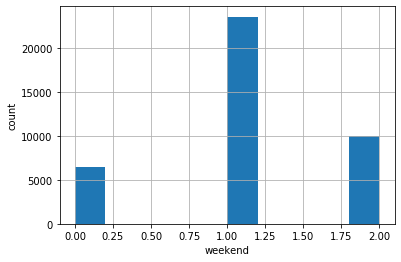

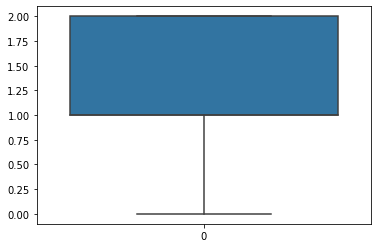

In [56]:
first_look(df1, 'weekend')

Столбец London
Распределение признака:


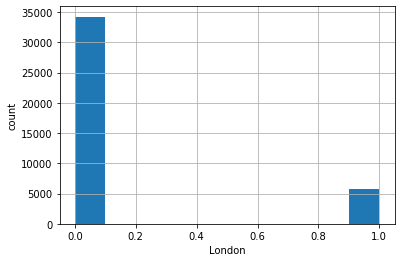

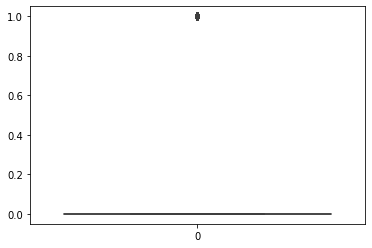

In [57]:
first_look(df1, 'London')

По итогам просмотра графики распределений и выбросов, прихожу к следующим выводам:
<br> 1) "бинарные" поля (города и кухни) смотреть отдельно на графиках нет смысла смотреть, не понятно, насколько полезная информация;
<br> 2) из небинарных параметров, самый интересный - Number of Reviews. Но не понимаю, что с этим делать, а просто отсекать, например, все строки, где Number of Reviews >, например, 3000, не хочу, т.к., логически, чем больше отзывов на ресторан, тем точнее оценка, но таких ресторанов очень мало => не понимаю, какую полезную информацию могу почерпнуть => перехожу к корреляции

В корреляции, учитывая, что столбцов получилось 166, не вижу смысла в построении, например, тепловой карты. Лучше посмотреть для каждого параметра, например, 6 параметров, корреляция по модулю с которыми самая сильная. сделаю это в ячейке ниже

In [58]:
num_correlation = df1.corr()

In [59]:
for i in num_correlation.columns:
    print(i)
    display(abs(num_correlation[i]).sort_values(ascending=False)[1:6])

Ranking


London                 0.499991
Rating                 0.368371
Paris                  0.328009
Vegetarian Friendly    0.300139
European               0.279235
Name: Ranking, dtype: float64

Rating


Ranking                0.368371
Vegetarian Friendly    0.128356
Vegan Options          0.122054
Gluten Free Options    0.099455
Madrid                 0.083462
Name: Rating, dtype: float64

Price Range


other_cuisines         0.680331
number of dates        0.470773
Vegetarian Friendly    0.447498
year                   0.377579
European               0.376258
Name: Price Range, dtype: float64

Number of Reviews


Gluten Free Options    0.408872
Vegetarian Friendly    0.364499
Vegan Options          0.318401
Price Range            0.312668
Ranking                0.222072
Name: Number of Reviews, dtype: float64

number of dates


year              0.909705
weekend           0.686564
season            0.545907
Price Range       0.470773
other_cuisines    0.345486
Name: number of dates, dtype: float64

year


number of dates    0.909705
weekend            0.752149
season             0.616955
Price Range        0.377579
other_cuisines     0.272317
Name: year, dtype: float64

season


year               0.616955
number of dates    0.545907
weekend            0.460887
Price Range        0.174316
other_cuisines     0.129408
Name: season, dtype: float64

weekend


year               0.752149
number of dates    0.686564
season             0.460887
Price Range        0.290620
other_cuisines     0.211113
Name: weekend, dtype: float64

Zurich


Swiss               0.341086
Ranking             0.091098
Central European    0.064237
London              0.047876
Paris               0.043611
Name: Zurich, dtype: float64

Warsaw


Polish              0.313658
Ranking             0.095860
Eastern European    0.072695
London              0.055787
Paris               0.050817
Name: Warsaw, dtype: float64

Vienna


Austrian            0.493182
Central European    0.120285
Ranking             0.092039
German              0.071874
London              0.071049
Name: Vienna, dtype: float64

Stockholm


Swedish         0.409657
Scandinavian    0.185851
Ranking         0.094931
London          0.059318
Paris           0.054034
Name: Stockholm, dtype: float64

Rome


Italian              0.345733
Pizza                0.177820
Mediterranean        0.152968
Seafood              0.133682
Number of Reviews    0.133542
Name: Rome, dtype: float64

Prague


Czech               0.611929
Central European    0.181166
Eastern European    0.145506
European            0.107247
Ranking             0.083389
Name: Prague, dtype: float64

Paris


French       0.436804
Ranking      0.328009
London       0.153146
Madrid       0.108409
Barcelona    0.101166
Name: Paris, dtype: float64

Oslo


Norwegian       0.410056
Scandinavian    0.146589
Ranking         0.082608
London          0.040422
Paris           0.036821
Name: Oslo, dtype: float64

Oporto


Portuguese    0.369499
Ranking       0.090281
European      0.081925
London        0.046735
Paris         0.042572
Name: Oporto, dtype: float64

Munich


German     0.154154
Ranking    0.093938
London     0.061960
Paris      0.056441
Afghani    0.046977
Name: Munich, dtype: float64

Milan


Italian            0.226160
Seafood            0.129079
number of dates    0.111885
year               0.109394
London             0.097314
Name: Milan, dtype: float64

Madrid


Spanish            0.364160
number of dates    0.168454
year               0.160627
weekend            0.121141
London             0.119011
Name: Madrid, dtype: float64

Lyon


French             0.156160
number of dates    0.097088
Ranking            0.096448
year               0.091850
weekend            0.071063
Name: Lyon, dtype: float64

Luxembourg


Ranking    0.065863
Nepali     0.034699
London     0.029788
French     0.029693
Paris      0.027134
Name: Luxembourg, dtype: float64

London


Ranking            0.499991
British            0.387820
number of dates    0.194149
year               0.170741
Paris              0.153146
Name: London, dtype: float64

Ljubljana


Slovenian           0.590714
Central European    0.082093
Ranking             0.062811
European            0.042671
Eastern European    0.039271
Name: Ljubljana, dtype: float64

Lisbon


Portuguese    0.546633
European      0.117321
Ranking       0.088900
London        0.075150
Paris         0.068456
Name: Lisbon, dtype: float64

Krakow


Polish              0.409388
Eastern European    0.115503
Central European    0.101075
Ranking             0.087357
European            0.059235
Name: Krakow, dtype: float64

Helsinki


Scandinavian    0.148532
Ranking         0.081664
London          0.039942
Paris           0.036384
Nepali          0.035412
Name: Helsinki, dtype: float64

Hamburg


German            0.120124
Ranking           0.097555
other_cuisines    0.072671
London            0.063919
Paris             0.058225
Name: Hamburg, dtype: float64

Geneva


Swiss      0.182153
Ranking    0.088282
French     0.078434
London     0.045236
Paris      0.041206
Name: Geneva, dtype: float64

Edinburgh


Scottish               0.487721
British                0.203787
Gluten Free Options    0.105113
Ranking                0.092951
Vegan Options          0.065498
Name: Edinburgh, dtype: float64

Dublin


Irish                  0.502885
Ranking                0.094965
Gluten Free Options    0.079227
number of dates        0.065262
Pub                    0.063886
Name: Dublin, dtype: float64

Copenhagen


Danish          0.473684
Scandinavian    0.201293
Ranking         0.094270
London          0.053068
Paris           0.048341
Name: Copenhagen, dtype: float64

Budapest


Hungarian           0.626425
Central European    0.148148
Eastern European    0.145236
Ranking             0.095534
European            0.094065
Name: Budapest, dtype: float64

Brussels


Belgian    0.436921
Ranking    0.095232
London     0.067650
Paris      0.061624
French     0.047955
Name: Brussels, dtype: float64

Bratislava


Ranking                0.075669
Central European       0.071822
Eastern European       0.052982
London                 0.035703
Vegetarian Friendly    0.032996
Name: Bratislava, dtype: float64

Berlin


German       0.205128
London       0.097843
Paris        0.089128
Madrid       0.069262
Barcelona    0.064634
Name: Berlin, dtype: float64

Barcelona


Spanish          0.346373
Mediterranean    0.177034
London           0.111059
Paris            0.101166
Madrid           0.078617
Name: Barcelona, dtype: float64

Athens


Greek            0.541751
Ranking          0.095177
Mediterranean    0.085396
London           0.051784
Paris            0.047171
Name: Athens, dtype: float64

Amsterdam


Dutch         0.500683
Indonesian    0.145894
Ranking       0.094372
European      0.080790
London        0.068497
Name: Amsterdam, dtype: float64

Xinjiang


Chinese                0.029127
Paris                  0.013387
Price Range            0.004262
Ranking                0.003640
Vegetarian Friendly    0.003116
Name: Xinjiang, dtype: float64

Yunnan


Thai                   0.036345
Barcelona              0.018460
Asian                  0.017525
Vegan Options          0.014068
Vegetarian Friendly    0.008023
Name: Yunnan, dtype: float64

Latvian


Hungarian           0.053066
Mexican             0.047141
Eastern European    0.044623
Budapest            0.034649
American            0.027120
Name: Latvian, dtype: float64

Burmese


Thai       0.036345
Chinese    0.029127
Asian      0.017525
London     0.012194
Rating     0.007533
Name: Burmese, dtype: float64

Salvadoran


Central American    0.085922
Latin               0.057327
Mexican             0.047141
Spanish             0.018232
Madrid              0.017227
Name: Salvadoran, dtype: float64

Azerbaijani


Ukrainian    0.166558
Arabic       0.098828
Fast Food    0.033512
Krakow       0.033036
Turkish      0.032997
Name: Azerbaijani, dtype: float64

Polynesian


Hawaiian         0.154186
Polish           0.036504
Krakow           0.033036
Munich           0.022863
International    0.016694
Name: Polynesian, dtype: float64

Welsh


British                0.034698
Lyon                   0.022877
French                 0.010969
Price Range            0.009722
Gluten Free Options    0.009247
Name: Welsh, dtype: float64

Fujian


Minority Chinese    0.213118
Soups               0.031223
Chinese             0.019989
Milan               0.014058
Madrid              0.011155
Name: Fujian, dtype: float64

Ecuadorean


South American    0.103217
Latin             0.028010
Madrid            0.025115
Spanish           0.016861
Rating            0.012987
Name: Ecuadorean, dtype: float64

Native American


Pakistani           0.089755
Bangladeshi         0.056975
American            0.054241
Central American    0.042526
African             0.039749
Name: Native American, dtype: float64

Caucasian


Georgian            0.242393
Armenian            0.133474
Eastern European    0.066656
Grill               0.044343
Swedish             0.037665
Name: Caucasian, dtype: float64

Uzbek


Central Asian       0.258060
Minority Chinese    0.134682
Russian             0.117111
Prague              0.021821
Turkish             0.020159
Name: Uzbek, dtype: float64

Canadian


Brazilian         0.039118
Diner             0.025172
American          0.023021
South American    0.022214
Krakow            0.020185
Name: Canadian, dtype: float64

New Zealand


Australian      0.166429
Swedish         0.030486
American        0.020639
British         0.018370
Contemporary    0.016561
Name: New Zealand, dtype: float64

Chilean


South American    0.127560
Latin             0.100886
Argentinean       0.053592
Peruvian          0.035826
Spanish           0.030778
Name: Chilean, dtype: float64

Albanian


Ljubljana      0.025239
European       0.024400
Lyon           0.021811
Street Food    0.020725
Geneva         0.014660
Name: Albanian, dtype: float64

Romanian


Eastern European    0.069677
European            0.023636
Bratislava          0.016921
Central European    0.014247
Turkish             0.013418
Name: Romanian, dtype: float64

Minority Chinese


Fujian           0.213118
Uzbek            0.134682
Chinese          0.087573
Central Asian    0.086777
Singaporean      0.068836
Name: Minority Chinese, dtype: float64

Central Asian


Uzbek               0.258060
Minority Chinese    0.086777
Georgian            0.069682
Korean              0.043655
Russian             0.037278
Name: Central Asian, dtype: float64

Filipino


Singaporean    0.065875
Taiwanese      0.061166
Asian          0.055245
Malaysian      0.051393
Thai           0.029692
Name: Filipino, dtype: float64

Mongolian


Chinese    0.068925
Asian      0.065583
Tibetan    0.054122
Sushi      0.028685
Munich     0.024312
Name: Mongolian, dtype: float64

Armenian


Eastern European    0.142835
Caucasian           0.133474
Georgian            0.129305
Russian             0.069536
Arabic              0.036786
Name: Armenian, dtype: float64

Georgian


Caucasian           0.242393
Armenian            0.129305
Eastern European    0.096335
Central Asian       0.069682
Russian             0.062967
Name: Georgian, dtype: float64

Southwestern


Central American    0.103370
Mexican             0.101891
Latin               0.040238
Barbecue            0.028662
Nepali              0.025715
Name: Southwestern, dtype: float64

Ukrainian


Russian             0.308978
Azerbaijani         0.166558
Eastern European    0.157402
Polish              0.084741
Georgian            0.056754
Name: Ukrainian, dtype: float64

Singaporean


Malaysian           0.329233
Asian               0.076407
Minority Chinese    0.068836
Filipino            0.065875
Chinese             0.065064
Name: Singaporean, dtype: float64

Cambodian


Asian         0.078393
Vietnamese    0.076962
Paris         0.036000
Indonesian    0.028280
Thai          0.021771
Name: Cambodian, dtype: float64

Colombian


South American      0.172593
Latin               0.153080
Caribbean           0.068580
Central American    0.056546
Venezuelan          0.034674
Name: Colombian, dtype: float64

Egyptian


Arabic            0.124557
Middle Eastern    0.118004
Halal             0.061752
Lebanese          0.047491
Afghani           0.047173
Name: Egyptian, dtype: float64

Cajun & Creole


Caribbean     0.115019
Afghani       0.047173
Cuban         0.046114
Paris         0.029176
Indonesian    0.028280
Name: Cajun & Creole, dtype: float64

Tunisian


Moroccan          0.127539
African           0.086691
Middle Eastern    0.075593
Mediterranean     0.053123
Halal             0.042144
Name: Tunisian, dtype: float64

Hawaiian


Polynesian        0.154186
Jamaican          0.043096
Healthy           0.041299
South American    0.031890
Norwegian         0.024235
Name: Hawaiian, dtype: float64

Afghani


Middle Eastern    0.158425
Halal             0.102551
Persian           0.057771
Egyptian          0.047173
Cajun & Creole    0.047173
Name: Afghani, dtype: float64

Taiwanese


Asian       0.078179
Chinese     0.066313
Filipino    0.061166
Fusion      0.032933
Peruvian    0.020883
Name: Taiwanese, dtype: float64

Cuban


Caribbean           0.388602
Central American    0.088512
Latin               0.082242
Cajun & Creole      0.046114
Venezuelan          0.032236
Name: Cuban, dtype: float64

Australian


New Zealand      0.166429
Vegan Options    0.030116
Argentinean      0.029884
American         0.029836
Indonesian       0.025661
Name: Australian, dtype: float64

Tibetan


Nepali           0.245674
Asian            0.066531
Mongolian        0.054122
Vegan Options    0.036587
Indonesian       0.025661
Name: Tibetan, dtype: float64

Sri Lankan


Indian                 0.127855
Asian                  0.083860
Zurich                 0.031816
Vegetarian Friendly    0.022301
Vegan Options          0.019642
Name: Sri Lankan, dtype: float64

Jamaican


Caribbean        0.518035
London           0.046742
Hawaiian         0.043096
Vegan Options    0.025983
Ranking          0.017451
Name: Jamaican, dtype: float64

Croatian


Central European    0.042316
European            0.035962
Vienna              0.035550
Seafood             0.035329
Grill               0.032109
Name: Croatian, dtype: float64

Malaysian


Singaporean    0.329233
Indonesian     0.162792
Asian          0.090801
Chinese        0.065257
Thai           0.062706
Name: Malaysian, dtype: float64

Venezuelan


South American      0.202943
Latin               0.179991
Caribbean           0.129856
Central American    0.052711
Madrid              0.044001
Name: Venezuelan, dtype: float64

Ethiopian


African                0.509036
Vegan Options          0.034956
Vegetarian Friendly    0.026228
European               0.018793
Price Range            0.017955
Name: Ethiopian, dtype: float64

Kosher


Israeli             0.401816
Middle Eastern      0.068127
Krakow              0.037733
Eastern European    0.035269
Tunisian            0.030730
Name: Kosher, dtype: float64

Arabic


Lebanese          0.128613
Egyptian          0.124557
Middle Eastern    0.116402
Azerbaijani       0.098828
Moroccan          0.092442
Name: Arabic, dtype: float64

Persian


Middle Eastern         0.248022
Halal                  0.154085
Afghani                0.057771
Vegetarian Friendly    0.024765
London                 0.024223
Name: Persian, dtype: float64

Russian


Ukrainian           0.308978
Eastern European    0.167904
Uzbek               0.117111
Armenian            0.069536
Georgian            0.062967
Name: Russian, dtype: float64

Indonesian


Malaysian      0.162792
Amsterdam      0.145894
Asian          0.122364
Singaporean    0.058955
Thai           0.028485
Name: Indonesian, dtype: float64

Slovenian


Ljubljana           0.590714
Central European    0.111324
European            0.065596
Eastern European    0.055698
Ranking             0.038691
Name: Slovenian, dtype: float64

Israeli


Kosher            0.401816
Middle Eastern    0.199825
Lebanese          0.066935
Vegan Options     0.060290
Mediterranean     0.048604
Name: Israeli, dtype: float64

Norwegian


Oslo            0.410056
Scandinavian    0.259595
European        0.062784
Danish          0.049351
Swedish         0.041447
Name: Norwegian, dtype: float64

Bangladeshi


Balti     0.389103
Indian    0.241671
Halal     0.169661
Asian     0.142043
London    0.078605
Name: Bangladeshi, dtype: float64

Nepali


Tibetan                0.245674
Indian                 0.189239
Asian                  0.139000
Vegan Options          0.069105
Vegetarian Friendly    0.041349
Name: Nepali, dtype: float64

Balti


Bangladeshi         0.389103
Indian              0.275507
Halal               0.166417
Asian               0.151494
Eastern European    0.138863
Name: Balti, dtype: float64

Caribbean


Jamaican          0.518035
Cuban             0.388602
Venezuelan        0.129856
Cajun & Creole    0.115019
Latin             0.103729
Name: Caribbean, dtype: float64

Peruvian


South American    0.393346
Latin             0.168743
Chilean           0.035826
Madrid            0.034131
Fusion            0.028770
Name: Peruvian, dtype: float64

Pakistani


Indian             0.288709
Halal              0.201523
Middle Eastern     0.191101
Balti              0.096694
Native American    0.089755
Name: Pakistani, dtype: float64

Brazilian


South American    0.364902
Latin             0.123420
Barbecue          0.080684
Lisbon            0.042284
Portuguese        0.039241
Name: Brazilian, dtype: float64

Central American


Latin             0.398286
Mexican           0.347267
South American    0.209921
Southwestern      0.103370
Cuban             0.088512
Name: Central American, dtype: float64

Moroccan


Middle Eastern    0.180502
Halal             0.159520
Tunisian          0.127539
Mediterranean     0.111185
African           0.098473
Name: Moroccan, dtype: float64

African


Ethiopian         0.509036
Moroccan          0.098473
Tunisian          0.086691
Caribbean         0.080818
Middle Eastern    0.055369
Name: African, dtype: float64

Scottish


Edinburgh              0.487721
British                0.295830
Gluten Free Options    0.088168
Bar                    0.066446
Pub                    0.063872
Name: Scottish, dtype: float64

Korean


Asian            0.221065
Japanese         0.065842
Barbecue         0.065242
Central Asian    0.043655
Sushi            0.039747
Name: Korean, dtype: float64

Argentinean


South American    0.407280
Steakhouse        0.277587
Latin             0.176877
Barbecue          0.170207
Chilean           0.053592
Name: Argentinean, dtype: float64

Swedish


Scandinavian    0.430907
Stockholm       0.409657
European        0.106856
Ranking         0.047554
Price Range     0.042237
Name: Swedish, dtype: float64

Danish


Copenhagen      0.473684
Scandinavian    0.406998
European        0.101123
Cafe            0.052659
Ranking         0.051471
Name: Danish, dtype: float64

Swiss


Zurich              0.341086
Geneva              0.182153
Central European    0.116369
European            0.108413
Ranking             0.053201
Name: Swiss, dtype: float64

Brew Pub


Pub          0.175996
Wine Bar     0.102389
Bar          0.075913
Rome         0.057706
Gastropub    0.044470
Name: Brew Pub, dtype: float64

Street Food


Fast Food         0.085429
Healthy           0.062411
Delicatessen      0.048429
other_cuisines    0.044723
Rating            0.036019
Name: Street Food, dtype: float64

Belgian


Brussels       0.436921
European       0.125327
French         0.095199
Ranking        0.049691
Price Range    0.047615
Name: Belgian, dtype: float64

Irish


Dublin                 0.502885
Pub                    0.157249
Bar                    0.130564
Gluten Free Options    0.076267
Gastropub              0.070817
Name: Irish, dtype: float64

Dutch


Amsterdam        0.500683
European         0.137654
Bar              0.084893
International    0.069574
Cafe             0.061183
Name: Dutch, dtype: float64

Diner


American          0.107008
other_cuisines    0.047385
Fast Food         0.045455
German            0.039205
Delicatessen      0.038883
Name: Diner, dtype: float64

Latin


Central American    0.398286
Mexican             0.359723
South American      0.316505
Venezuelan          0.179991
Argentinean         0.176877
Name: Latin, dtype: float64

Lebanese


Middle Eastern    0.438984
Halal             0.269338
Mediterranean     0.185968
Arabic            0.128613
Moroccan          0.097332
Name: Lebanese, dtype: float64

Scandinavian


Swedish       0.430907
Danish        0.406998
Norwegian     0.259595
Copenhagen    0.201293
Stockholm     0.185851
Name: Scandinavian, dtype: float64

Hungarian


Budapest            0.626425
Eastern European    0.231331
Central European    0.220091
European            0.153296
International       0.087930
Name: Hungarian, dtype: float64

Polish


Krakow              0.409388
Warsaw              0.313658
Eastern European    0.267217
Central European    0.192578
European            0.152826
Name: Polish, dtype: float64

South American


Argentinean         0.407280
Peruvian            0.393346
Brazilian           0.364902
Latin               0.316505
Central American    0.209921
Name: South American, dtype: float64

Austrian


Vienna              0.493182
Central European    0.238646
German              0.189307
European            0.152913
Ranking             0.059935
Name: Austrian, dtype: float64

Delicatessen


Cafe              0.069650
Wine Bar          0.064333
other_cuisines    0.054690
Street Food       0.048429
Healthy           0.047096
Name: Delicatessen, dtype: float64

Turkish


Middle Eastern    0.314232
Halal             0.250434
Barbecue          0.071071
Fast Food         0.069780
Mediterranean     0.069096
Name: Turkish, dtype: float64

Mexican


Latin               0.359723
Central American    0.347267
South American      0.103949
Southwestern        0.101891
Fast Food           0.072012
Name: Mexican, dtype: float64

Gastropub


Pub            0.224429
Bar            0.140041
British        0.100938
Irish          0.070817
Price Range    0.069552
Name: Gastropub, dtype: float64

Grill


Steakhouse        0.158713
Barbecue          0.130570
other_cuisines    0.061221
Price Range       0.060488
Argentinean       0.052313
Name: Grill, dtype: float64

Soups


Seafood                0.119450
Number of Reviews      0.107549
Vegetarian Friendly    0.085638
Vegan Options          0.079338
Vietnamese             0.075772
Name: Soups, dtype: float64

Eastern European


Central European    0.412459
Polish              0.267217
Czech               0.247503
Hungarian           0.231331
Russian             0.167904
Name: Eastern European, dtype: float64

Vietnamese


Asian        0.248754
Thai         0.140650
Cambodian    0.076962
Chinese      0.076369
Soups        0.075772
Name: Vietnamese, dtype: float64

Contemporary


Price Range       0.087301
Healthy           0.072855
other_cuisines    0.063275
Fusion            0.059905
European          0.054511
Name: Contemporary, dtype: float64

Barbecue


Steakhouse     0.289670
Argentinean    0.170207
Grill          0.130570
American       0.121965
Brazilian      0.080684
Name: Barbecue, dtype: float64

Steakhouse


Barbecue          0.289670
Argentinean       0.277587
Grill             0.158713
South American    0.097913
Price Range       0.094843
Name: Steakhouse, dtype: float64

Fusion


Japanese          0.094778
Asian             0.091841
Price Range       0.080773
other_cuisines    0.066507
Sushi             0.065488
Name: Fusion, dtype: float64

Czech


Prague              0.611929
Central European    0.281930
Eastern European    0.247503
European            0.202467
Bar                 0.079569
Name: Czech, dtype: float64

Halal


Middle Eastern    0.487037
Lebanese          0.269338
Turkish           0.250434
Pakistani         0.201523
Indian            0.193366
Name: Halal, dtype: float64

Greek


Athens            0.541751
Mediterranean     0.158496
Ranking           0.068879
other_cuisines    0.068069
Rating            0.044228
Name: Greek, dtype: float64

Healthy


Vegan Options     0.105481
Cafe              0.089057
Contemporary      0.072855
other_cuisines    0.068978
Soups             0.068429
Name: Healthy, dtype: float64

German


Central European    0.290669
Berlin              0.205128
Austrian            0.189307
Munich              0.154154
Hamburg             0.120124
Name: German, dtype: float64

Wine Bar


Brew Pub          0.102389
Price Range       0.075178
other_cuisines    0.073208
French            0.066587
Delicatessen      0.064333
Name: Wine Bar, dtype: float64

Thai


Asian             0.320072
Vietnamese        0.140650
Chinese           0.114074
other_cuisines    0.075629
European          0.074198
Name: Thai, dtype: float64

Middle Eastern


Halal       0.487037
Lebanese    0.438984
Turkish     0.314232
Persian     0.248022
Israeli     0.199825
Name: Middle Eastern, dtype: float64

Indian


Pakistani      0.288709
Balti          0.275507
Asian          0.268205
Bangladeshi    0.241671
Halal          0.193366
Name: Indian, dtype: float64

Portuguese


Lisbon            0.546633
Oporto            0.369499
European          0.258733
Mediterranean     0.110315
other_cuisines    0.092746
Name: Portuguese, dtype: float64

Chinese


Asian             0.315273
Thai              0.114074
Japanese          0.111054
European          0.097433
other_cuisines    0.094370
Name: Chinese, dtype: float64

Sushi


Japanese          0.695930
Asian             0.335970
other_cuisines    0.094836
European          0.092431
Chinese           0.091203
Name: Sushi, dtype: float64

American


Fast Food         0.189440
Barbecue          0.121965
Bar               0.110942
Diner             0.107008
other_cuisines    0.101355
Name: American, dtype: float64

Central European


Eastern European    0.412459
European            0.313866
German              0.290669
Czech               0.281930
Austrian            0.238646
Name: Central European, dtype: float64

Japanese


Sushi             0.695930
Asian             0.357169
Chinese           0.111054
other_cuisines    0.107150
European          0.106845
Name: Japanese, dtype: float64

Seafood


Mediterranean    0.189208
Price Range      0.147534
Rome             0.133682
Milan            0.129079
Italian          0.128952
Name: Seafood, dtype: float64

International


Price Range         0.118161
European            0.112164
other_cuisines      0.111629
Central European    0.100575
Hungarian           0.087930
Name: International, dtype: float64

British


London       0.387820
Scottish     0.295830
Pub          0.261859
Bar          0.253917
Edinburgh    0.203787
Name: British, dtype: float64

Fast Food


American          0.189440
other_cuisines    0.115997
Street Food       0.085429
Middle Eastern    0.072107
Mexican           0.072012
Name: Fast Food, dtype: float64

Cafe


other_cuisines         0.136565
British                0.090806
Healthy                0.089057
Vegan Options          0.086429
Vegetarian Friendly    0.080133
Name: Cafe, dtype: float64

Pub


Bar          0.692814
British      0.261859
Gastropub    0.224429
Brew Pub     0.175996
Irish        0.157249
Name: Pub, dtype: float64

Spanish


Madrid            0.364160
Barcelona         0.346373
Mediterranean     0.296399
other_cuisines    0.150763
Price Range       0.122839
Name: Spanish, dtype: float64

Pizza


Italian                0.477892
Rome                   0.177820
Mediterranean          0.169137
other_cuisines         0.152235
Vegetarian Friendly    0.135573
Name: Pizza, dtype: float64

Asian


Japanese    0.357169
Sushi       0.335970
Thai        0.320072
Chinese     0.315273
Indian      0.268205
Name: Asian, dtype: float64

French


Paris             0.436804
European          0.190514
Price Range       0.179180
other_cuisines    0.161833
Lyon              0.156160
Name: French, dtype: float64

Bar


Pub               0.692814
British           0.253917
Price Range       0.174442
other_cuisines    0.164764
Gastropub         0.140041
Name: Bar, dtype: float64

Gluten Free Options


Vegan Options          0.487448
Vegetarian Friendly    0.466960
Number of Reviews      0.408872
Price Range            0.305854
Ranking                0.214648
Name: Gluten Free Options, dtype: float64

Vegan Options


Vegetarian Friendly    0.553545
Gluten Free Options    0.487448
Number of Reviews      0.318401
Price Range            0.247973
Ranking                0.214913
Name: Vegan Options, dtype: float64

Italian


Pizza             0.477892
Rome              0.345733
Mediterranean     0.324204
other_cuisines    0.230120
Milan             0.226160
Name: Italian, dtype: float64

Mediterranean


Italian                0.324204
Spanish                0.296399
Price Range            0.281414
Vegetarian Friendly    0.245179
other_cuisines         0.237174
Name: Mediterranean, dtype: float64

other_cuisines


Price Range            0.680331
number of dates        0.345486
Vegetarian Friendly    0.342587
European               0.318660
year                   0.272317
Name: other_cuisines, dtype: float64

European


Price Range            0.376258
other_cuisines         0.318660
Central European       0.313866
Ranking                0.279235
Vegetarian Friendly    0.266105
Name: European, dtype: float64

Vegetarian Friendly


Vegan Options          0.553545
Gluten Free Options    0.466960
Price Range            0.447498
Number of Reviews      0.364499
other_cuisines         0.342587
Name: Vegetarian Friendly, dtype: float64

из корреляционного анализа видно, что наш target Rating более или менее коррелирован только 
с 3 параметрами:
    <br> 1) Ranking 0.368371;
    <br> 2) Vegetarian Friendly 0.128356;
    <br> 3) Vegan Options 0.122054.
    
    Для всех остальных параметров корреляция < 0.1 => по шкале Чеддока линейная корреляция даже не слабая.

Между собой сильно (> 0.6) коррелированы параметры:
    <br>number of dates - year 0.909705
<br>season -  year 0.616955
<br>weekend - year 0.752149
<br>Budapest - Hungarian 0.626425
<br>Czech - Prague 0.611929
<br>Sushi - Japanese 0.695930
<br>Pub - Bar 0.692814
<br>other_cuisines - Price Range 0.680331

вроде бы, можно удалить некоторые из этих параметров, в частности, year сильно коррелирован с number of dates, season, weekend, но эксперименты показывают, что модель дает самый лучший результат, когда все эти параметры участвуют

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [60]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df1.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df1['Rating']

In [61]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [62]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [63]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [64]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [65]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21117950000000002
